# Lab session on returns

To calculate returns, you have to think in terms of numerical expressions of percentages and the effect of compounding

In [102]:
import numpy as np # This is a library that helps to work with numbers in pythons

prices_array = np.array([8.70, 8.91, 8.71])

print(prices_array)

[8.7  8.91 8.71]


## Let's calculate the returns of price slicing the array

In [103]:
# prices[1:] This will slice the array since the position 1 (8.91 up until 8.71)

# prices[:-1] This will slice the array since the position 0 up until the last element (8.7 and 8.91)

prices_array[1:] / prices_array[:-1] - 1

array([ 0.02413793, -0.02244669])

Pandas is a library that allows us to work with dataframes (matrices of information) and manipulate them for our analysis

In [104]:
import pandas as pd # Library to work with matrices

prices = pd.DataFrame(
    {'BLUE': [8.70, 8.91, 8.71, 8.43, 8.73],
    'ORANGE': [10.66, 11.08, 10.71, 11.59, 12.11]
     }
)

prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


## Calculate the returns slicing the pandas dataframe

We need to use iloc and values commands

In [105]:
ret_df = prices.iloc[1:].values / prices.iloc[:-1] - 1

ret_df

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


Now we can use the shift command to simplify the calculation

In [106]:
returns_df = prices / prices.shift(1) - 1

returns_df

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


Now, we can use an even better way to calculate returns

In [107]:
returns_df_2 = prices.pct_change()

returns_df_2

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


# Fire up external data

Use pandas to load external data, in this case a csv file

In [108]:
prices = pd.read_csv('dbs/sample_prices.csv')

In [109]:
returns = prices.pct_change()

Graph the prices using the command plot

<AxesSubplot:>

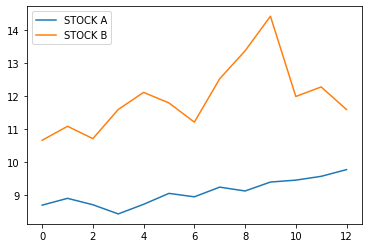

In [110]:
prices.plot()

Now let's chart the returns

<AxesSubplot:>

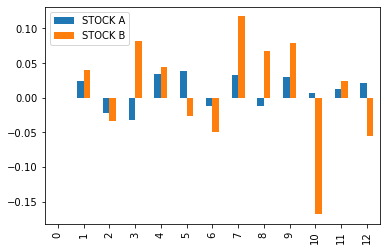

In [111]:
returns.plot.bar()

Using the std command we can calculate the standard deviation of the dataframe, which is a measure of volatility of the stocks (risk)

In [112]:
returns.std()

STOCK A    0.023977
STOCK B    0.079601
dtype: float64

The mean command calculates the mean return of both stocks

In [113]:
returns.mean()

STOCK A    0.01
STOCK B    0.01
dtype: float64

To calculate the compounded return of each stock, we can use the prod command. But remember, we need to add 1 to each return and then substract 1 to the final number

In [114]:
(returns + 1).prod() -1

STOCK A    0.123310
STOCK B    0.087167
dtype: float64

## Calculate the annualized return

Let's say we have a monthly return of 3%

In [115]:
ret = 0.03

The annualized return of 3% would be the compounding of this return 12 times

In [116]:
(1 + ret)**12 - 1

0.4257608868461793

Let's show this information a little bit better, rounding it to 2 decimals

In [117]:
print(round((((1 + ret)**12 - 1) * 100), 2))

42.58


In [118]:
import pandas as pd

prices = pd.read_csv('data/sample_prices.csv')

returns = prices.pct_change().dropna()

Decomposing the estimation of std. deviations

In [119]:
import numpy as np

deviations = returns - returns.mean()

squared_deviations = deviations ** 2

variance = squared_deviations.mean()

volatility = np.sqrt(variance)

volatility #  This gives the population standard deviation

BLUE      0.022957
ORANGE    0.076212
dtype: float64

Let's work on the sample std dev.

In [120]:
number_obs = returns.shape[0]

sample_variance = squared_deviations.sum() / (number_obs - 1)

volatility = sample_variance ** 0.5

In [121]:
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [122]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

Annualizing the std. dev.

In [123]:
returns.std() * np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

# Let's fire up a portfolio

In [124]:
import pandas as pd
import numpy as np

me_m = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', header=0, index_col=0, parse_dates=True, na_values=-99.99)

Let's only use the large and small cap companies

In [125]:
cols = ['Lo 10', 'Hi 10']

returns = me_m[cols]

returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


Because the data is multiplied by 100 to represent %, let's use the numerical representation (divided by 100)

<AxesSubplot:>

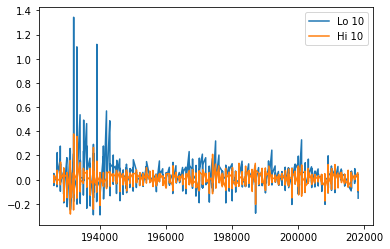

In [126]:
returns = returns / 100

returns.plot()

<AxesSubplot:>

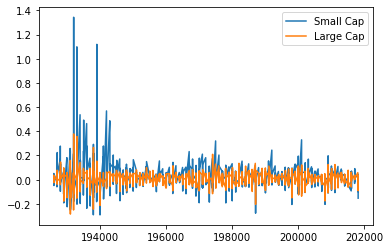

In [127]:
returns.columns = ['Small Cap', 'Large Cap']

returns.plot()

In [128]:
annualized_volatility = returns.std() * np.sqrt(12)

annualized_volatility

Small Cap    0.368193
Large Cap    0.186716
dtype: float64

Annualizing the returns

In [130]:
n_months = returns.shape[0]

return_per_month = (returns + 1).prod() ** (1 / n_months) - 1

return_per_month

Small Cap    0.012986
Large Cap    0.007423
dtype: float64

In [131]:
annualized_return = (return_per_month + 1) ** 12 - 1

annualized_return

Small Cap    0.167463
Large Cap    0.092810
dtype: float64

Another way of estimating it

In [132]:
annualized_return = (returns + 1).prod() ** (12 / n_months) - 1

annualized_return

Small Cap    0.167463
Large Cap    0.092810
dtype: float64

## Risk adjusted return

In [133]:
ratio = annualized_return / annualized_volatility

ratio

Small Cap    0.454825
Large Cap    0.497063
dtype: float64

## Now let's include this on the Sharpe ratio

In [134]:
risk_free_rat = 0.03

excees_return = annualized_return - risk_free_rat

sharpe_ratio = excees_return / annualized_volatility

sharpe_ratio

Small Cap    0.373346
Large Cap    0.336392
dtype: float64